In [1]:
import os
os.environ['AOC_SESSION'] = '53616c7465645f5ff17c6f54fd23191499c7017d6366538fcc35b61d0225390f78827c662577ddcc8d5d64ddf58c68c56d6ad68e5721930a5b7a5803b0bee173'

In [2]:
import aocd
from aocd.models import Puzzle
day = 18
year = 2023
puzzle = Puzzle(year=year, day=day)
# data = aocd.get_data(day=day, year=year)
with open('./data/input_{:02d}'.format(day), 'w') as fh:
    fh.write(puzzle.input_data)

In [89]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [5]:
test_data = """R 6 (#70c710)
D 5 (#0dc571)
L 2 (#5713f0)
D 2 (#d2c081)
R 2 (#59c680)
D 2 (#411b91)
L 5 (#8ceee2)
U 2 (#caa173)
L 1 (#1b58a2)
U 2 (#caa171)
R 2 (#7807d2)
U 3 (#a77fa3)
L 2 (#015232)
U 2 (#7a21e3)
"""
data_test = test_data.splitlines()

In [4]:
data = puzzle.input_data.splitlines()
len(data), data[:10]

(660,
 ['L 3 (#07b412)',
  'D 5 (#713ad1)',
  'L 2 (#11e6d2)',
  'D 4 (#6ba7d3)',
  'L 3 (#7cfca2)',
  'U 5 (#0a85c3)',
  'L 2 (#3a5282)',
  'U 4 (#6f91a3)',
  'L 3 (#32c2f0)',
  'U 6 (#2dd7b3)'])

In [71]:
def parse(data):
    res = []
    for line in data:
        d, s, c = line.split(' ')
        s = int(s)
        c = c[1:-1]
        res.append((d,s,c))
    return res

dmap = {
    'U': 1j,
    'D': -1j,
    'R': 1+0j,
    'L': -1+0j,
}

def get_vertices(instructions):
    pos = 0
    points = [pos]
    edges = []
    prev = pos
    for ins in instructions:
        d, s, c = ins
        pos += s * dmap[d]
        points.append(pos)
        edges.append((prev, pos, c))
        prev = pos
    if pos != 0: 
        points.append(pos)
        edges.append((prev, pos, c))
    return points, edges

def get_min_max(points):
    minx = min([int(p.real) for p in points])
    maxx = max([int(p.real) for p in points])
    miny = min([int(p.imag) for p in points])
    maxy = max([int(p.imag) for p in points])
    return (minx, maxx, miny, maxy)

def build_border(edges):
    border = defaultdict(list)
    for edge in edges:
        start, end, col = edge
        vec = end - start
        unit = vec / abs(vec)
        pos = start
        while pos != end:
            border[pos].append(col)
            pos += unit
        border[end].append(col)
    return border

def get_nbrs(pos):
    for d in dmap.values():
        yield pos + d
        
def check(pos, minx, maxx, miny, maxy):
    if pos.real < minx or pos.real > maxx or pos.imag < miny or pos.imag > maxy:
        return False
    return True
    
def fill_outside(extremes, border):
    outside = set()
    minx, maxx, miny, maxy = extremes
    minx -= 1
    miny -= 1
    maxx += 1
    maxy += 1
    area = (maxx - minx+1) * (maxy - miny+1)
    q = [(minx + maxy * 1j)]
    seen = set()
    while len(q):
        nxt = q.pop()
        if nxt in seen:
            continue
        seen.add(nxt)
            
        for nbr in get_nbrs(nxt):
            if not check(nbr, minx, maxx, miny, maxy):
                continue
            if nbr in border:
                continue
            q.append(nbr)
            outside.add(nbr)
    return outside, area
            
    
    
    

In [76]:
# points, edges = get_vertices(parse(data_test))
points, edges = get_vertices(parse(data))
extremes = get_min_max(points)
border = build_border(edges)
outside, area = fill_outside(extremes, border)

In [77]:
res = area - len(outside)
res

26857

In [78]:
puzzle.answer_a = res

That's the right answer!  You are one gold star closer to restoring snow operations. [Continue to Part Two]


In [79]:
# Part 2

In [125]:
dmap_b = {
    '3': 'U',
    '1': 'D',
    '0': 'R',
    '2': 'L',
}
def parse_b(data):
    res = []
    for line in data:
        d, s, c = line.split(' ')
        c = c[1:-1]
        s = int(c[1:-1], 16)
        d = dmap_b[c[-1]]
        res.append((d,s,c))
    return res

def get_area(edges):
    res = 0
    for edge in edges:
        s, e, c = edge
        x1 = int(s.real)
        y1 = int(s.imag)
        x2 = int(e.real)
        y2 = int(e.imag)
        res += x1 * y2 - y1 * x2
    res /= 2
    return abs(res)


In [147]:
# points, edges = get_vertices(parse_b(data_test))
points, edges = get_vertices(parse_b(data))

In [148]:
border_len = sum([abs(e-s) for s, e, c in edges]) / 2
res = int(get_area(edges) + border_len + 1)
res

129373230496292

In [150]:
puzzle.answer_b = res

That's the right answer!  You are one gold star closer to restoring snow operations.You have completed Day 18! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


In [192]:
dmap2 = {
    'U': (0, 1),
    'D': (0, -1),
    'R': (1, 0),
    'L': (-1, 0),
}

def get_area_rects(instructions):
    area = 1
    x = y = 0
    for d, n, _ in instructions:
        dx, dy = dmap2[d]
        dx *= n
        dy *= n
        area += dx * y + n/2
        y += dy
    
    return abs(int(area))

In [193]:
ins = parse_b(data)

In [194]:
get_area_rects(ins)

129373230496292

In [151]:
ps = np.array([(p.real, p.imag) for p in points])

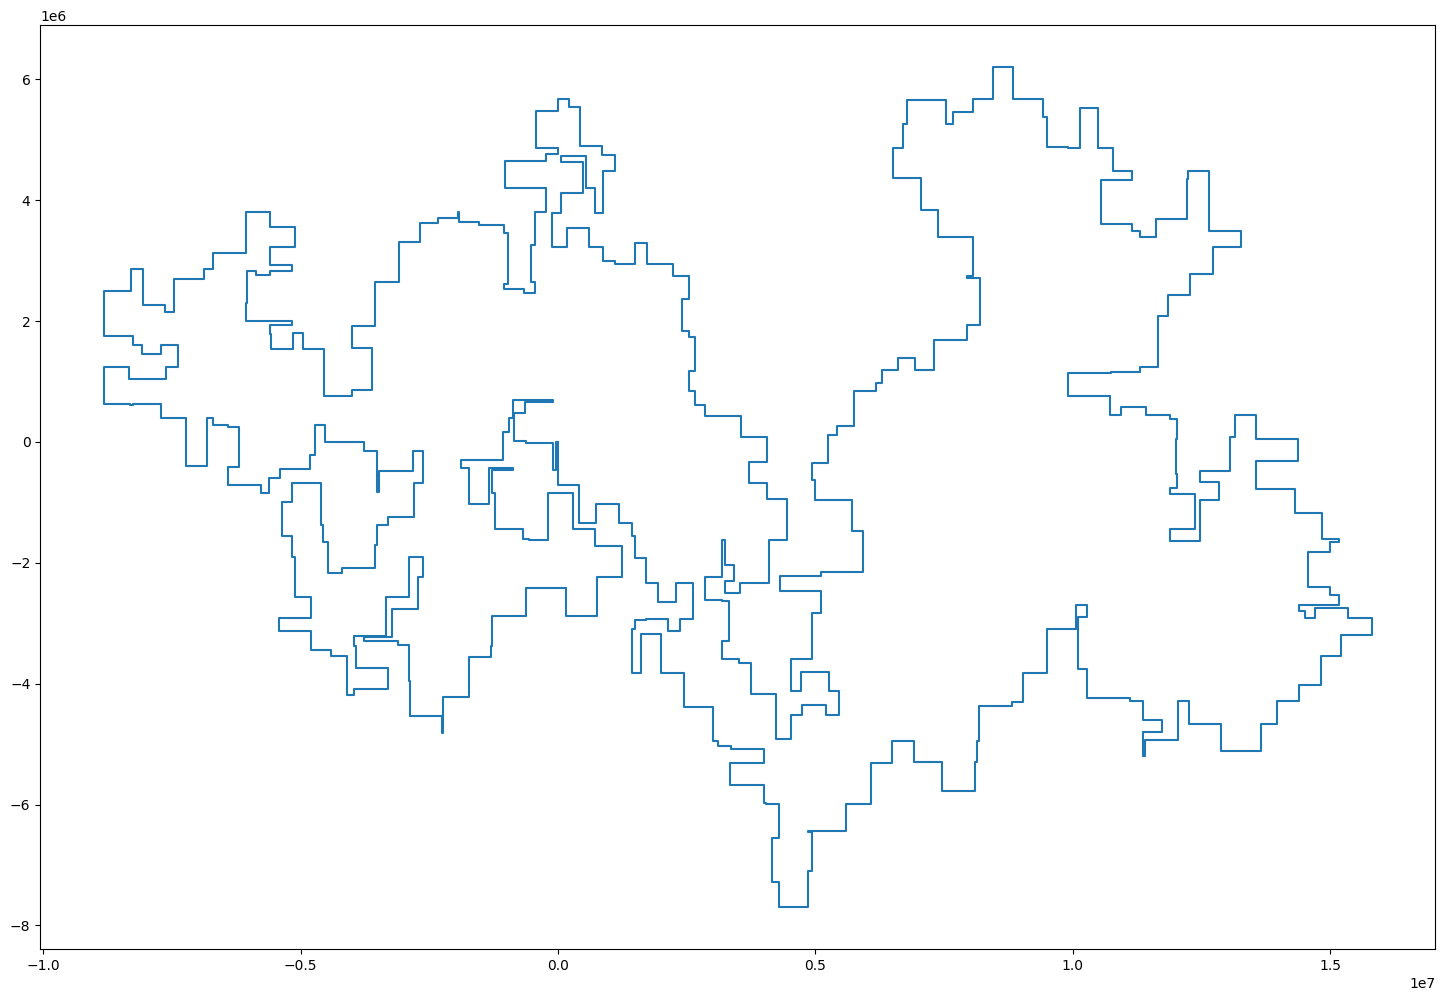

In [152]:
plt.rcParams['figure.figsize'] = (18, 12)
plt.plot(ps[:,0], ps[:,1])

In [96]:
ps[0, :]

array([0., 0.])